# Customer Segmentation Using Bagging & Boosting

### Data Description
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

Data Source: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

### Columns

| Feature | Description |
|---------|-------------|
| ID | Unique ID |
| Gender | Gender of the customer |
| Ever_Married | Marital status of the customer |
| Age | Age of the customer |
| Graduated | Is the customer a graduate? |
| Profession | Profession of the customer |
| Work_Experience | Work Experience in years |
| Spending_Score | Spending score of the customer |
| Family_Size | Number of family members for the customer (including the customer) |
| Var_1 | Anonymised Category for the customer |
| Segmentation | (target) Customer Segment of the customer |

# 1. Data Pre-Processing

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
# Import the Data and view info
df = pd.read_csv('./Data/Train.csv')
# Rename Var_1 to Category
df.rename(columns={'Var_1': 'Category'}, inplace=True)

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Exploration

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Category         7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [172]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [173]:
print("Unique values in each column:\n")
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Category', 'Segmentation']:
    print(f"{col:15} :", df[col].nunique(), "unique values")
    print("-" * 50)
    print(f"Values: {df[col].unique()}")
    print("\n")

Unique values in each column:

Gender          : 2 unique values
--------------------------------------------------
Values: ['Male' 'Female']


Ever_Married    : 2 unique values
--------------------------------------------------
Values: ['No' 'Yes' nan]


Graduated       : 2 unique values
--------------------------------------------------
Values: ['No' 'Yes' nan]


Profession      : 9 unique values
--------------------------------------------------
Values: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


Spending_Score  : 3 unique values
--------------------------------------------------
Values: ['Low' 'Average' 'High']


Category        : 7 unique values
--------------------------------------------------
Values: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


Segmentation    : 4 unique values
--------------------------------------------------
Values: ['D' 'A' 'B' 'C']




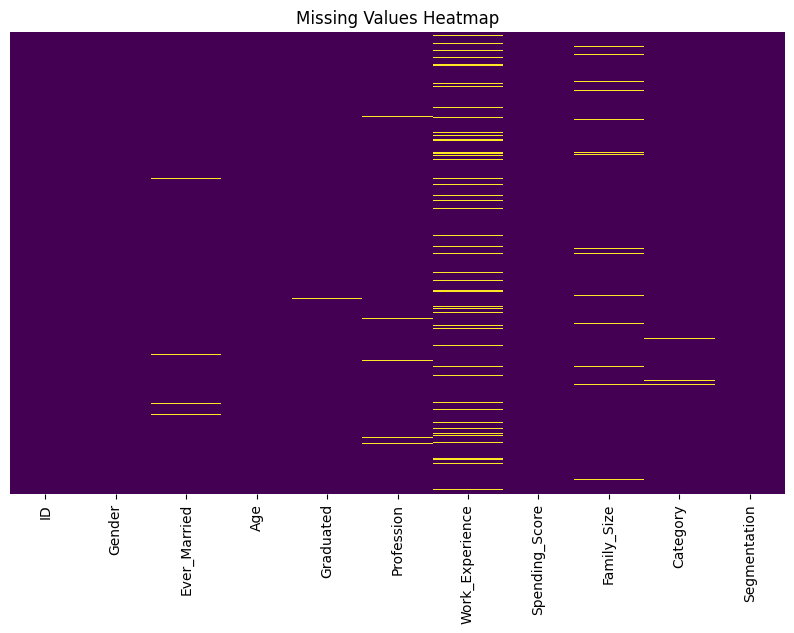

In [174]:
# Visualize Null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [175]:
# ID is not necessary
df = df.drop('ID', axis= 1)

In [176]:
# Count Null Values
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Category            76
Segmentation         0
dtype: int64

In [177]:
# Deal with null values with low frequencies which cannot be recovered
df.dropna(subset=['Ever_Married', 'Graduated', 'Category', 'Profession'], inplace=True)

In [178]:
df.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    764
Spending_Score       0
Family_Size        293
Category             0
Segmentation         0
dtype: int64

In [179]:
# Try to find a relation to recover missing data
print(df['Family_Size'].value_counts())
print('-'*50)
print(df['Work_Experience'].value_counts())

Family_Size
2.0    2294
3.0    1427
1.0    1379
4.0    1320
5.0     573
6.0     203
7.0      91
8.0      47
9.0      42
Name: count, dtype: int64
--------------------------------------------------
Work_Experience
1.0     2255
0.0     2211
9.0      457
8.0      424
2.0      271
3.0      245
4.0      241
6.0      191
7.0      190
5.0      185
10.0      52
11.0      48
12.0      46
13.0      45
14.0      44
Name: count, dtype: int64


In [180]:
df.fillna(
    {'Work_Experience': df['Work_Experience'].median(),
     'Family_Size': df['Family_Size'].median()},
    inplace=True
)

df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

### Do the same with Test Data

In [181]:
# Import the Data and view info
df_test = pd.read_csv('./Data/Test.csv')
# Rename Var_1 to Category
df_test.rename(columns={'Var_1': 'Category'}, inplace=True)

df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [182]:
# ID is not necessary
df_test = df_test.drop('ID', axis= 1)

# Deal with null values with low frequencies which cannot be recovered
df_test.dropna(subset=['Ever_Married', 'Graduated', 'Category', 'Profession'], inplace=True)

df_test.fillna(
    {'Work_Experience': df_test['Work_Experience'].median(),
     'Family_Size': df_test['Family_Size'].median()},
    inplace=True
)

df_test.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

# 2. Visualization

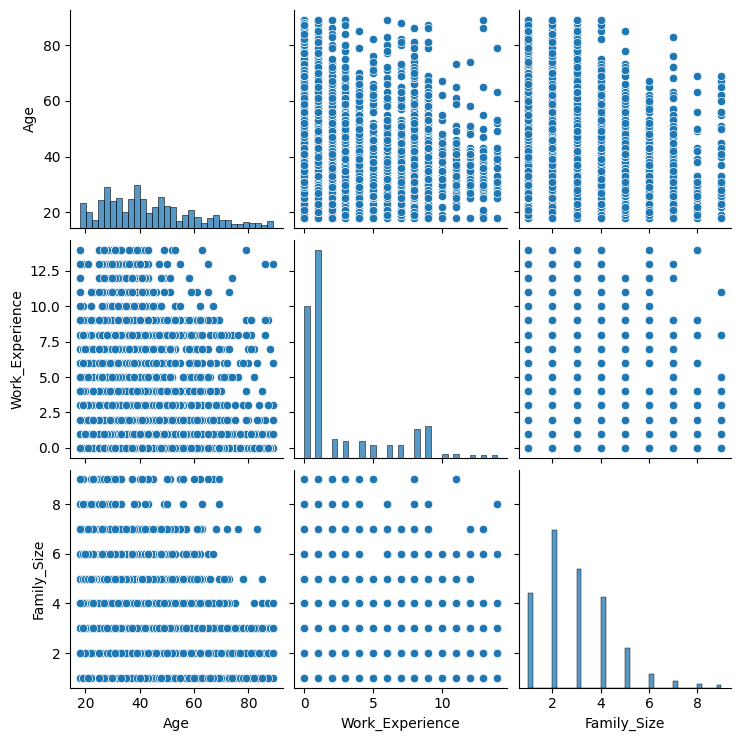

In [183]:
# Pair Plot
sns.pairplot(data= df)
plt.show()

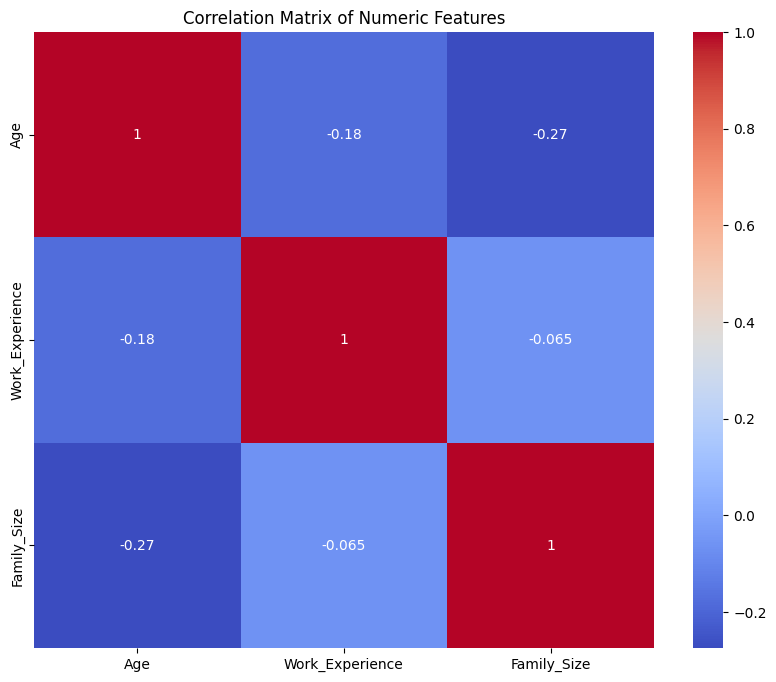

In [184]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data=df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

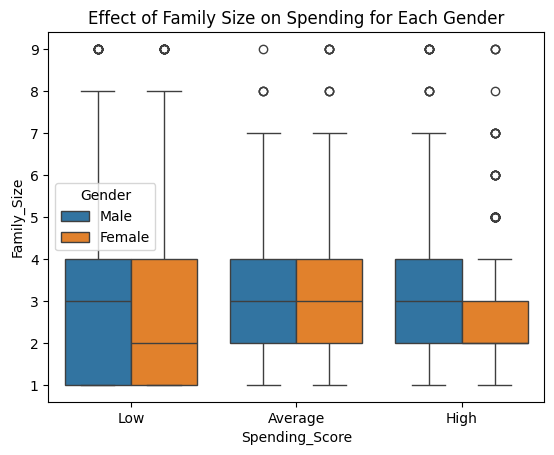

In [185]:
# Effect of Family size on Spending for each gender
sns.boxplot(data=df, x='Spending_Score', y='Family_Size', hue='Gender')
plt.title('Effect of Family Size on Spending for Each Gender')
plt.show()

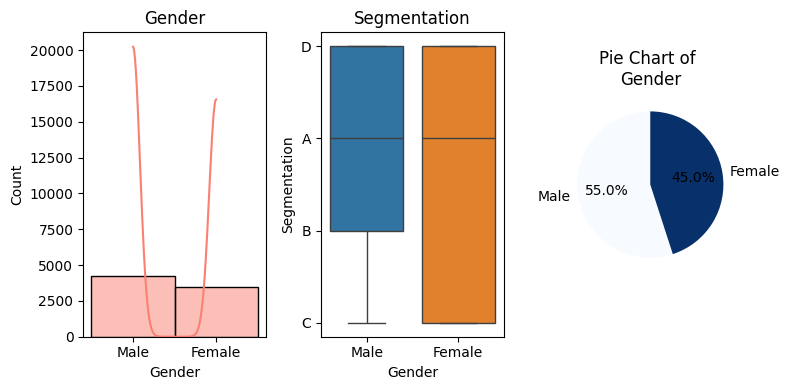

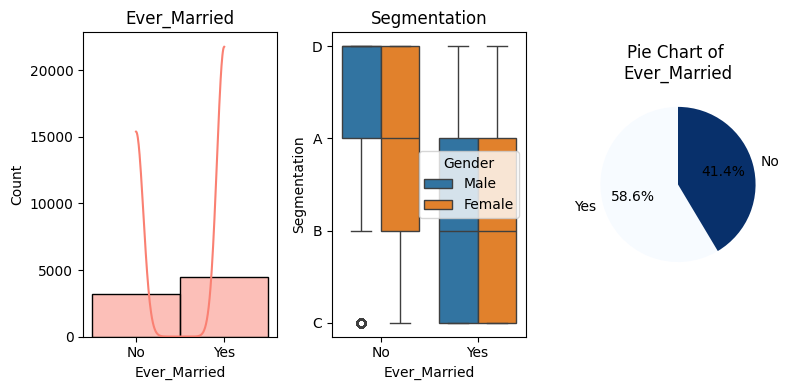

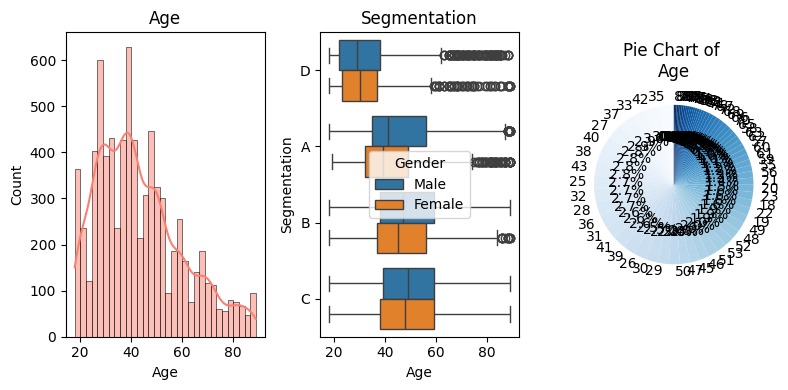

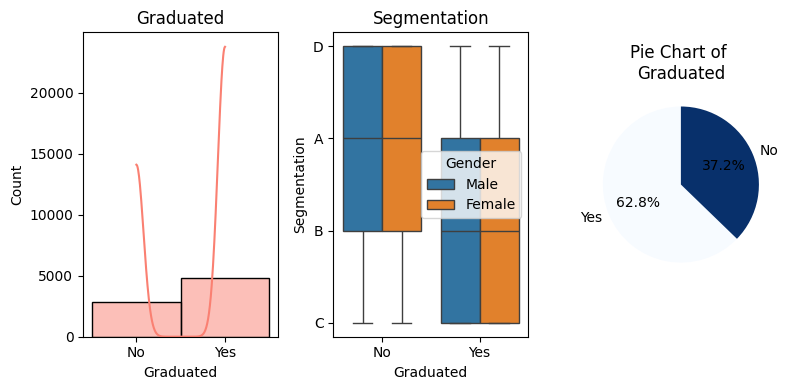

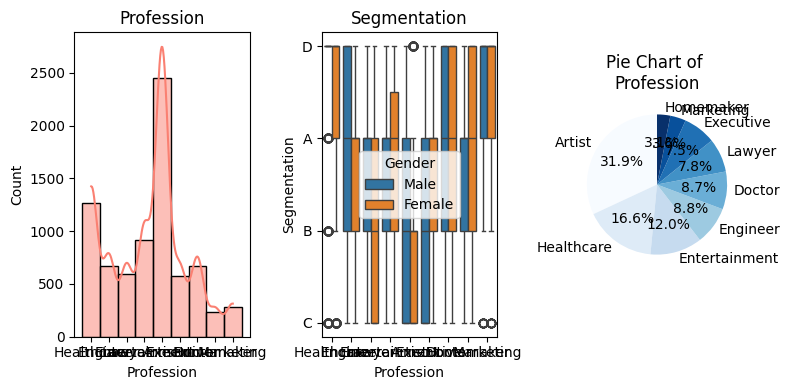

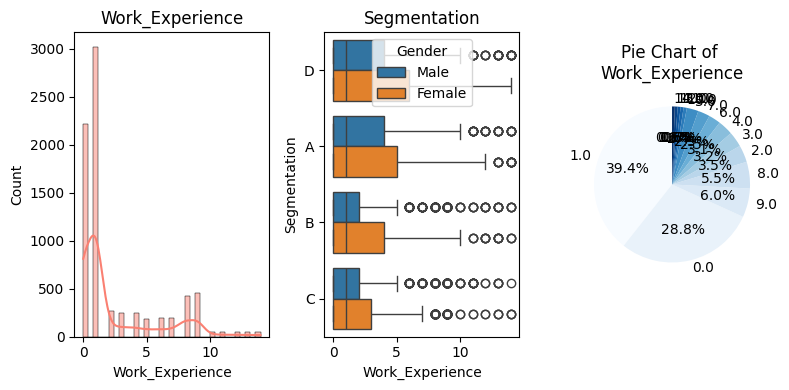

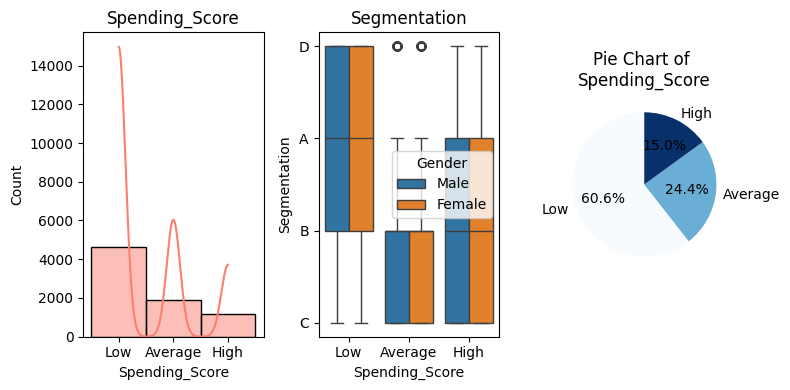

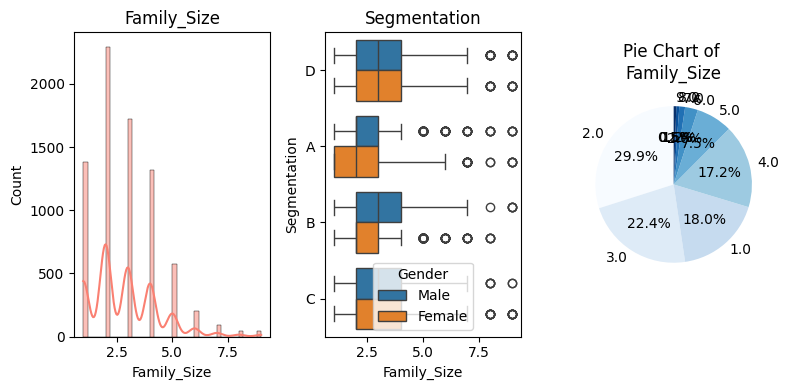

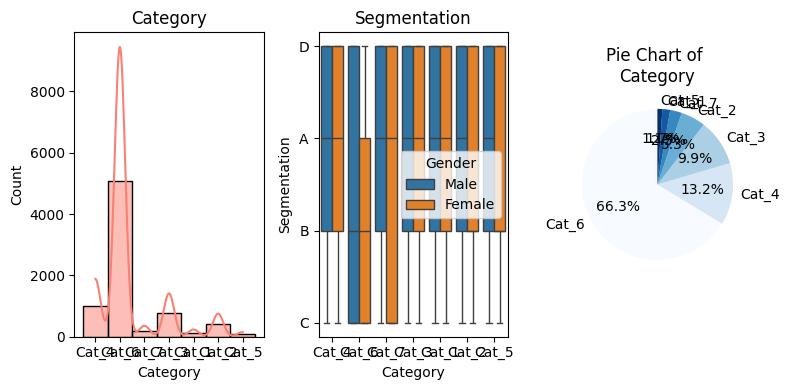

In [186]:
for col in df.columns:
    if col != 'Segmentation':
        plt.figure(figsize=(8, 4))  # Adjust the width and height of the figure

        # Work Experience Distribution
        plt.subplot(1, 3, 1)
        sns.histplot(data=df[col], color='salmon', kde=True)
        plt.title(col)

        # Relation between Work Experience and Segmentation
        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, x=col, y='Segmentation', hue='Gender')
        plt.title('Segmentation')

        # Pie Plot
        plt.subplot(1, 3, 3)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Blues')
        plt.title(f'Pie Chart of \n{col}')
        plt.ylabel('')

        plt.tight_layout()
        plt.show()

--------- **There are a lot of Outliers** ---------

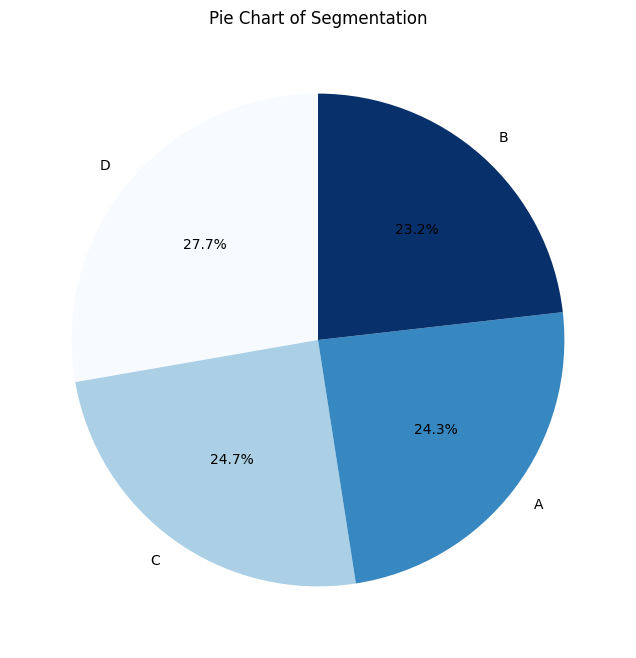

In [187]:
# Pie Plot
df[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, cmap='Blues')
plt.title(f'Pie Chart of {col}')
plt.ylabel('')
plt.show()

# 3. ML Time

## Encoding

In [188]:
from sklearn.preprocessing import LabelEncoder

# In case we need to reuse the LabelEncoder for multiple columns in the test set, we need to save the encoder of each column
le = dict()
lbld_train_data = df.copy()

cat_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    le[col] = LabelEncoder()
    lbld_train_data[col] = le[col].fit_transform(df[col])

lbld_train_data.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


## Feature Selection

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings

# Disable sklearn warnings
warnings.filterwarnings('ignore')

### Numerical Features

In [190]:
from sklearn.feature_selection import f_classif

In [191]:

x = lbld_train_data[numeric_columns]
y = lbld_train_data['Segmentation']

In [192]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size= 0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_cv.shape)
print(y_cv.shape)

(6135, 3)
(6135,)
(1534, 3)
(1534,)


In [193]:
# Obtain Scores
f_value, p_value = f_classif(x, y)
for i in range(len(f_value)):
    print(numeric_columns[i])
    print(f"F-value: {f_value[i]}\nP-values: {p_value[i]}\n")

Age
F-value: 463.6423940351132
P-values: 7.676508426553214e-277

Work_Experience
F-value: 19.01551434928546
P-values: 2.7814891819254174e-12

Family_Size
F-value: 99.38397660554915
P-values: 4.139470581184075e-63



The three features are relevant

## Categorical Features

In [194]:
from sklearn.feature_selection import chi2

In [195]:
x = lbld_train_data[cat_cols].drop('Segmentation', axis= 1)
y = lbld_train_data['Segmentation']

In [196]:
# Obtain Scores
score, p_value = chi2(x, y)
for i in range(len(score)):
    print(cat_cols[i])
    print(f"Score: {score[i]}\nP-values: {p_value[i]}\n")

Gender
Score: 5.452201528539733
P-values: 0.1415256110672976

Ever_Married
Score: 577.9682058047108
P-values: 6.017834819388883e-125

Graduated
Score: 380.4795339459585
P-values: 3.742498634867832e-82

Profession
Score: 2384.9411435723478
P-values: 0.0

Spending_Score
Score: 755.6331810022408
P-values: 1.8113765927639063e-163

Category
Score: 51.02470770708642
P-values: 4.8331481074178673e-11



All features are relevant

# 4. Building Models

### Scaling & Splitting

In [197]:
x = lbld_train_data.drop('Segmentation', axis= 1)
y = lbld_train_data['Segmentation']

In [198]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_cv shape: {x_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")

x_train shape: (6135, 9)
y_train shape: (6135,)
x_cv shape: (1534, 9)
y_cv shape: (1534,)


In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_cv[numeric_columns] = scaler.transform(x_cv[numeric_columns])

## I. Single Decision Tree

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [201]:
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [205]:
# Train Test
train_pred = dtree.predict(x_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1489
           1       0.94      0.95      0.94      1407
           2       0.96      0.93      0.95      1534
           3       1.00      0.96      0.98      1705

    accuracy                           0.96      6135
   macro avg       0.96      0.96      0.96      6135
weighted avg       0.96      0.96      0.96      6135



**Evaluating the model on the Cross-Validation Set**

In [202]:
cv_pred = dtree.predict(x_cv)

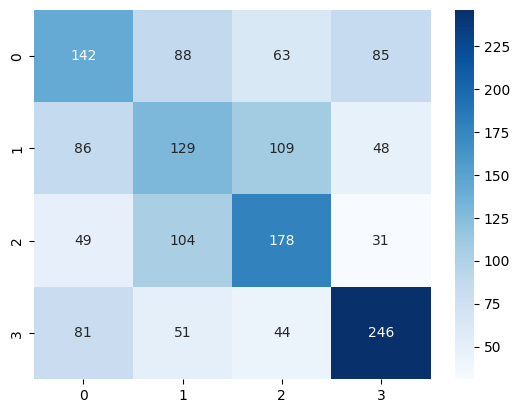

In [203]:
cm = confusion_matrix(y_cv, cv_pred)
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.show()

In [204]:
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.40      0.38      0.39       378
           1       0.35      0.35      0.35       372
           2       0.45      0.49      0.47       362
           3       0.60      0.58      0.59       422

    accuracy                           0.45      1534
   macro avg       0.45      0.45      0.45      1534
weighted avg       0.45      0.45      0.45      1534



## II. Bagging

### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf_clf = RandomForestClassifier(n_estimators= 5)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [208]:
# Train Test
train_pred = rf_clf.predict(x_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1489
           1       0.88      0.85      0.87      1407
           2       0.90      0.89      0.90      1534
           3       0.95      0.93      0.94      1705

    accuracy                           0.90      6135
   macro avg       0.90      0.90      0.90      6135
weighted avg       0.90      0.90      0.90      6135



**Evaluating the model on the Cross-Validation Set**

In [209]:
cv_pred = rf_clf.predict(x_cv)

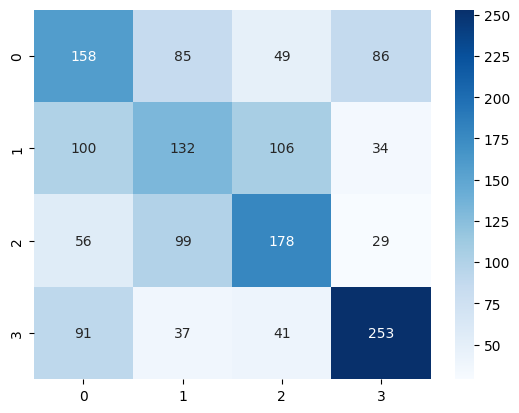

In [210]:
cm = confusion_matrix(y_cv, cv_pred)
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.show()

In [211]:
# CV Test
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.39      0.42      0.40       378
           1       0.37      0.35      0.36       372
           2       0.48      0.49      0.48       362
           3       0.63      0.60      0.61       422

    accuracy                           0.47      1534
   macro avg       0.47      0.47      0.47      1534
weighted avg       0.47      0.47      0.47      1534



### Bagging Classifier

In [212]:
from sklearn.ensemble import BaggingClassifier

In [213]:
bg_clf = BaggingClassifier(estimator= DecisionTreeClassifier(), n_estimators= 50)
bg_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)

In [214]:
train_pred = bg_clf.predict(x_train)

In [215]:
print(classification_report(train_pred, y_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1485
           1       0.93      0.95      0.94      1371
           2       0.96      0.94      0.95      1568
           3       0.98      0.97      0.98      1711

    accuracy                           0.96      6135
   macro avg       0.96      0.96      0.96      6135
weighted avg       0.96      0.96      0.96      6135



**Evaluating the model on the Cross-Validation set**

In [216]:
cv_pred = bg_clf.predict(x_cv)

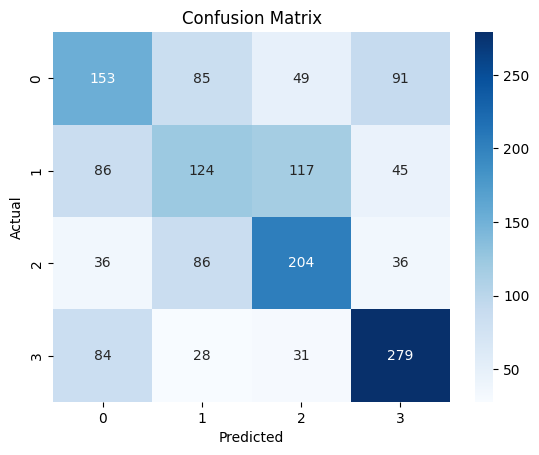

In [217]:
cm = confusion_matrix(y_cv, cv_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [218]:
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.43      0.40      0.42       378
           1       0.38      0.33      0.36       372
           2       0.51      0.56      0.53       362
           3       0.62      0.66      0.64       422

    accuracy                           0.50      1534
   macro avg       0.48      0.49      0.49      1534
weighted avg       0.49      0.50      0.49      1534



**Check Importance of features on the first Tree**

In [219]:
# Freature importance from one decision tree in bagging classifier
dtree_fitted = bg_clf.estimators_[0] # Access the first decision tree fitted on data
feature_importance = dtree_fitted.feature_importances_
feature_importance

array([0.0418982 , 0.0158196 , 0.37806106, 0.04010057, 0.12460817,
       0.14677291, 0.06021045, 0.10540261, 0.08712644])

In [220]:
features = x_train.columns
features

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category'],
      dtype='object')

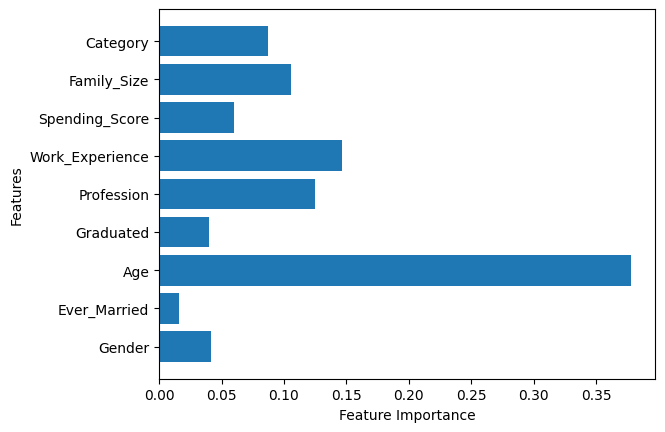

In [221]:
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

## III. Boosting

### AdaBoosting

In [222]:
from sklearn.ensemble import AdaBoostClassifier

In [223]:
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate= 1,  random_state=42)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [224]:
train_pred = ada_clf.predict(x_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.44      0.47      0.45      1489
           1       0.41      0.28      0.33      1407
           2       0.54      0.59      0.56      1534
           3       0.64      0.72      0.68      1705

    accuracy                           0.52      6135
   macro avg       0.51      0.51      0.51      6135
weighted avg       0.51      0.52      0.51      6135



**Evaluating the model on the Cross-Validation set**

In [225]:
cv_pred = ada_clf.predict(x_cv)

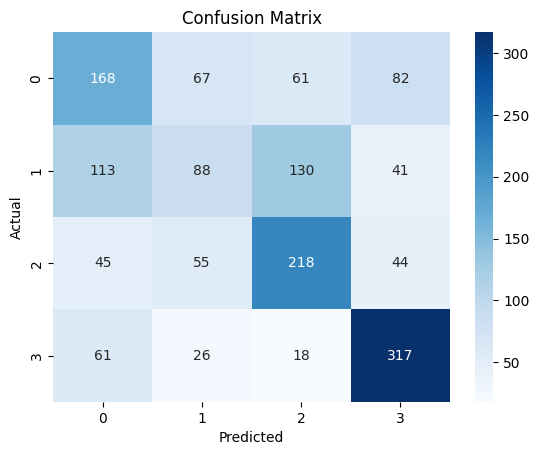

In [226]:
cm = confusion_matrix(y_cv, cv_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [227]:
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44       378
           1       0.37      0.24      0.29       372
           2       0.51      0.60      0.55       362
           3       0.65      0.75      0.70       422

    accuracy                           0.52      1534
   macro avg       0.49      0.51      0.50      1534
weighted avg       0.50      0.52      0.50      1534



### Gradient Boost

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, random_state=42)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=42)

In [230]:
train_pred = gb_clf.predict(x_train)
print(classification_report(train_pred, y_train))

              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1568
           1       0.38      0.47      0.42      1122
           2       0.60      0.61      0.60      1506
           3       0.74      0.65      0.69      1939

    accuracy                           0.57      6135
   macro avg       0.56      0.56      0.55      6135
weighted avg       0.58      0.57      0.57      6135



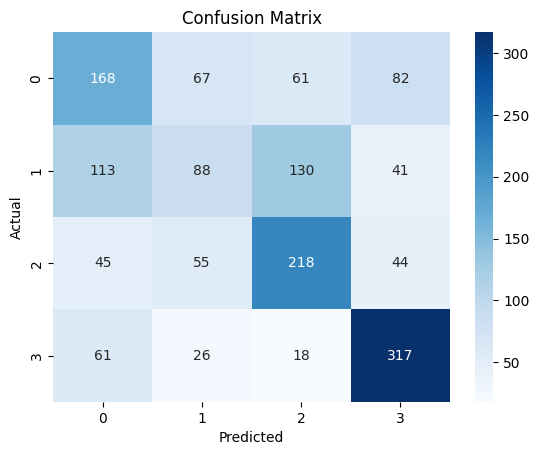

In [231]:
cm = confusion_matrix(y_cv, cv_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [232]:
cv_pred = gb_clf.predict(x_cv)
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.46      0.48      0.47       378
           1       0.43      0.31      0.36       372
           2       0.56      0.60      0.58       362
           3       0.65      0.72      0.68       422

    accuracy                           0.54      1534
   macro avg       0.52      0.53      0.52      1534
weighted avg       0.53      0.54      0.53      1534



### XGBoost

In [233]:
from xgboost import XGBClassifier

In [234]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=.1, random_state=42)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [235]:
train_pred = xgb_clf.predict(x_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1489
           1       0.64      0.50      0.56      1407
           2       0.68      0.71      0.70      1534
           3       0.72      0.84      0.78      1705

    accuracy                           0.68      6135
   macro avg       0.67      0.67      0.67      6135
weighted avg       0.67      0.68      0.67      6135



In [236]:
cv_pred = xgb_clf.predict(x_cv)

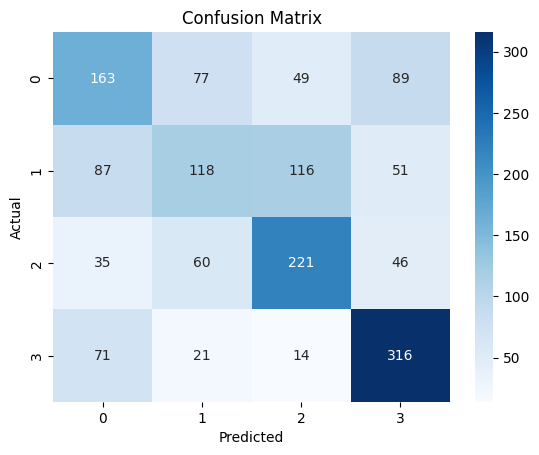

In [237]:
cm = confusion_matrix(y_cv, cv_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [238]:
print(classification_report(y_cv, cv_pred))

              precision    recall  f1-score   support

           0       0.46      0.43      0.44       378
           1       0.43      0.32      0.36       372
           2       0.55      0.61      0.58       362
           3       0.63      0.75      0.68       422

    accuracy                           0.53      1534
   macro avg       0.52      0.53      0.52      1534
weighted avg       0.52      0.53      0.52      1534



# 5. Grid Search 

In [239]:
from sklearn.model_selection import GridSearchCV

In [240]:
models = [
    {"name": "Decision Tree", "model": DecisionTreeClassifier(), "parameters": {"max_depth": [None, 10, 20, 30]}},
    {"name": "Random Forest", "model": RandomForestClassifier(), "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "Bagging Classifier", "model": BaggingClassifier(), "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "AdaBoost", "model": AdaBoostClassifier(), "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "Gradient Boosting", "model": GradientBoostingClassifier(), "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "XGBoost", "model": XGBClassifier(), "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}}
]

In [241]:
# Function to plot grid search results
def plot_grid_search(cv_results, param_name, model_name):
    plt.title(f"Grid Search Scores for {model_name}", fontsize=16)
    plt.xlabel(param_name, fontsize=14)
    plt.ylabel("Mean Test Score", fontsize=14)
    plt.grid()

    param_values = cv_results['param_' + param_name].data
    mean_test_scores = cv_results['mean_test_score']

    plt.scatter(param_values, mean_test_scores, marker='o')

In [242]:
best_models = {}

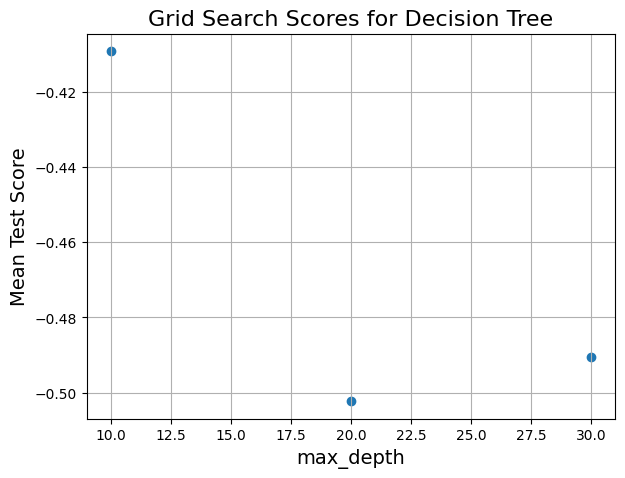

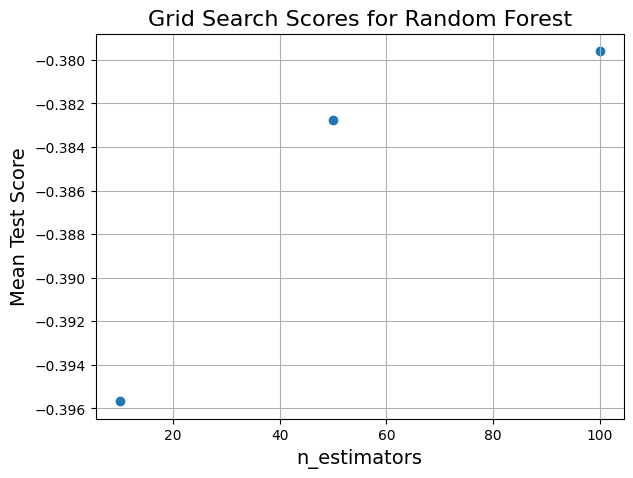

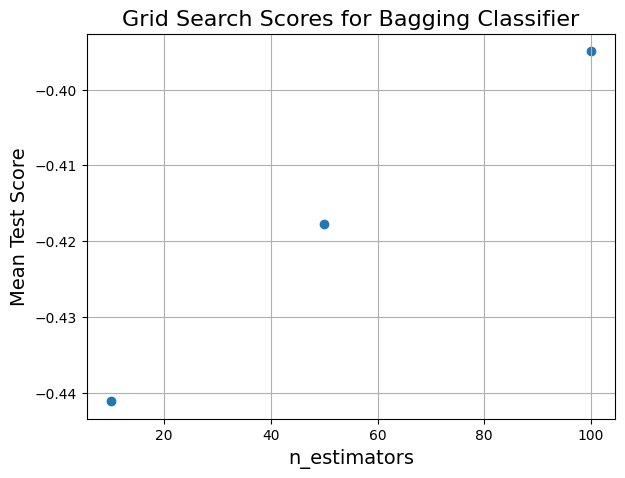

/media/ahmedelhefnawy/NewVolume/DEPI/Technical/.lvenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/ahmedelhefnawy/NewVolume/DEPI/Technical/.lvenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/ahmedelhefnawy/NewVolume/DEPI/Technical/.lvenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/ahmedelhefnawy/NewVolume/DEPI/Technical/.lvenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

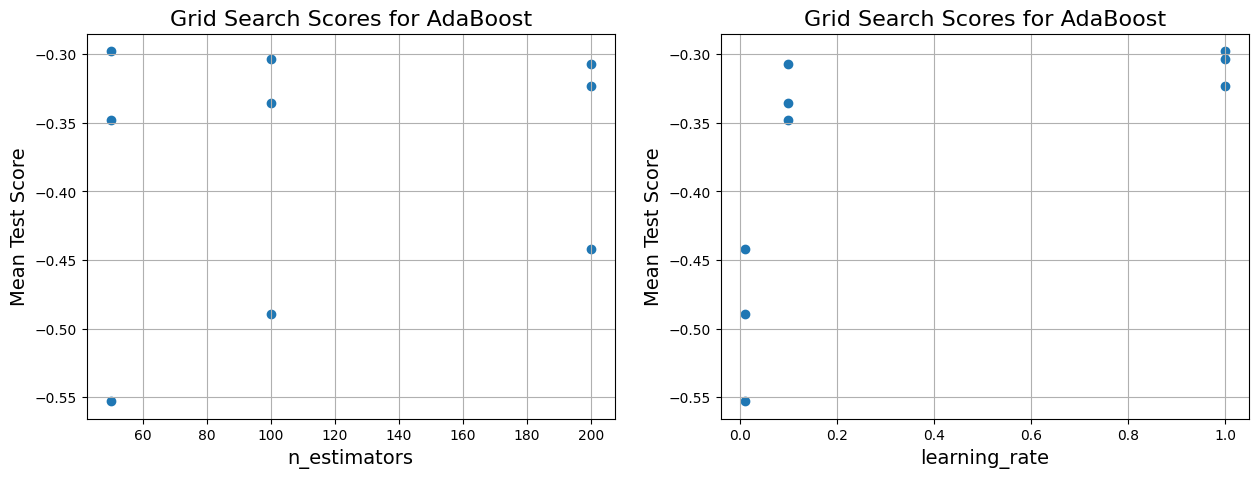

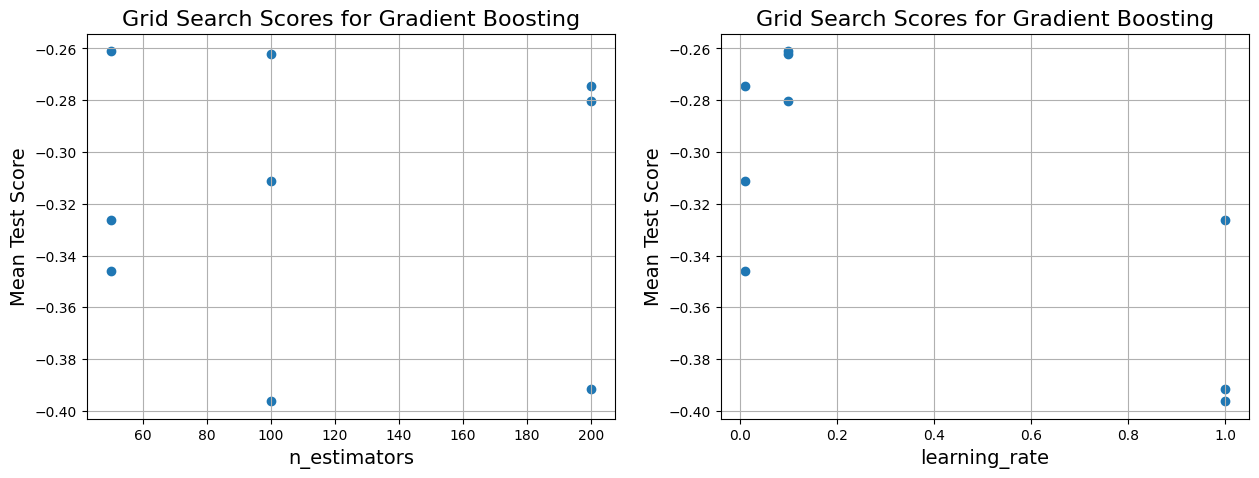

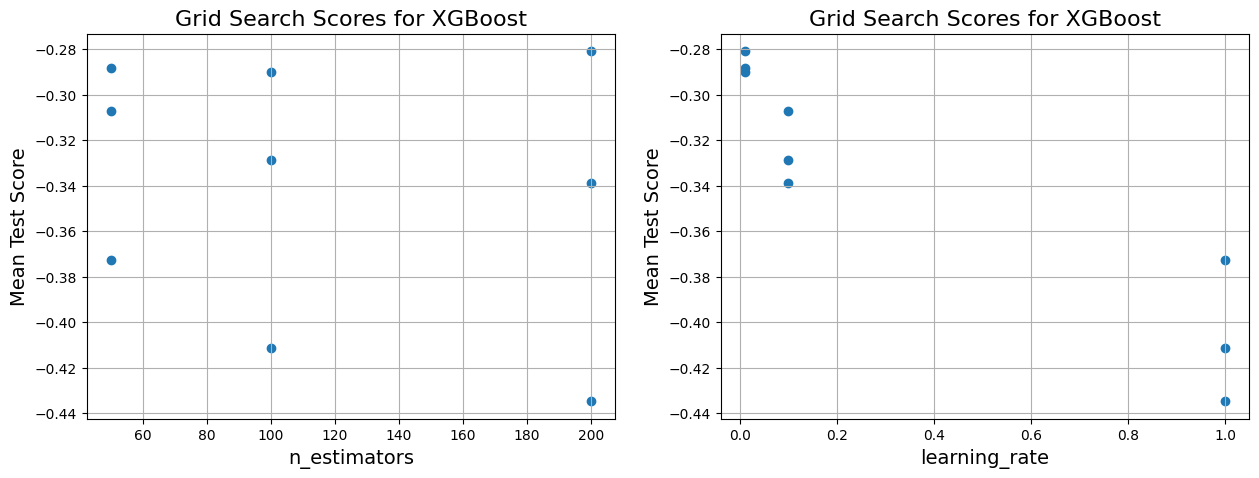

In [243]:
# Perform grid search and plot results for each model
for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    param_grid = model_info["parameters"]

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    plt.figure(figsize=(15, 5))
    idx = 0
    for param_name in param_grid.keys():
        plt.subplot(1, 2, idx%2+1)
        plot_grid_search(grid_search.cv_results_, param_name, model_name)
        idx += 1
    
    plt.show()
    
    best_models[model_name] = grid_search.best_params_

In [244]:
best_models

{'Decision Tree': {'max_depth': 10},
 'Random Forest': {'n_estimators': 100},
 'Bagging Classifier': {'n_estimators': 100},
 'AdaBoost': {'learning_rate': 1, 'n_estimators': 50},
 'Gradient Boosting': {'learning_rate': 0.1, 'n_estimators': 50},
 'XGBoost': {'learning_rate': 0.01, 'n_estimators': 200}}

# 3. Evaluation on the test set

## Pre-Processing

In [245]:
# Encode the Categorical Columns in the Test Data
lbld_test = df_test.copy()
for col in cat_cols:
    lbld_test[col] = le[col].transform(df_test[col])

# Scaling the Numeric Columns
lbld_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

lbld_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,0,1,-0.453964,1,2,-0.758543,2,-1.248242,5,1
1,1,1,-0.394282,1,5,1.698998,0,0.762074,5,0
3,1,1,0.918726,0,4,2.620575,1,-0.578137,5,1
4,0,0,-1.468561,0,8,-0.451350,2,0.762074,5,0
5,1,1,0.202540,1,1,-0.758543,1,1.432180,3,2


In [246]:
# Scale the Numeric Columns in the Test Data
x_eval = lbld_test.drop('Segmentation', axis= 1)
y_eval = lbld_test['Segmentation']


## Getting the Results of Best Models

In [247]:
models = [
    {"name": "Decision Tree", "model": DecisionTreeClassifier, "parameters": {"max_depth": [None, 10, 20, 30]}},
    {"name": "Random Forest", "model": RandomForestClassifier, "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "Bagging Classifier", "model": BaggingClassifier, "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "AdaBoost", "model": AdaBoostClassifier, "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "Gradient Boosting", "model": GradientBoostingClassifier, "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "XGBoost", "model": XGBClassifier, "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}}
]

In [248]:
for model_info in models:
    params = best_models[model_info['name']]
    model = model_info['model'](**params)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_eval)
    
    print(f"Model: #----{model_info['name']}----#")
    print(classification_report(y_eval, y_pred))
    

Model: #----Decision Tree----#
              precision    recall  f1-score   support

           0       0.34      0.22      0.27       794
           1       0.26      0.31      0.28       523
           2       0.25      0.35      0.29       445
           3       0.42      0.44      0.43       726

    accuracy                           0.33      2488
   macro avg       0.32      0.33      0.32      2488
weighted avg       0.33      0.33      0.32      2488

Model: #----Random Forest----#
              precision    recall  f1-score   support

           0       0.34      0.25      0.29       794
           1       0.24      0.25      0.24       523
           2       0.25      0.34      0.29       445
           3       0.42      0.43      0.42       726

    accuracy                           0.32      2488
   macro avg       0.31      0.32      0.31      2488
weighted avg       0.33      0.32      0.32      2488

Model: #----Bagging Classifier----#
              precision    recal

<div align="center">

# **Thank You**
</div>